<a href="https://colab.research.google.com/github/stayaizulska173/DZ7/blob/master/Copy_of_Lesson7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
# import plotly.plotly as py 
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Linear Regression: Head Size  vs Brain Weight

**1. Read data**

In [0]:
df = pd.read_csv('headbrain.csv')

In [0]:
df.head(6)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300


In [0]:
col = df['Head Size(cm^3)'] 
col.head(5)

0    4512
1    3738
2    4261
3    3777
4    4177
Name: Head Size(cm^3), dtype: int64

In [0]:
# delete empty rows
clean_df = df.dropna()
print(df.size)
print(clean_df.size)

948
948


**2. Split into train and test**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size=0.2)

In [0]:
y_training_set = training_set['Brain Weight(grams)'].to_numpy()
x_training_set = training_set['Head Size(cm^3)'].to_numpy()

y_test_set = test_set['Brain Weight(grams)'].to_numpy()
x_test_set = test_set['Head Size(cm^3)'].to_numpy()

**3. Plot**

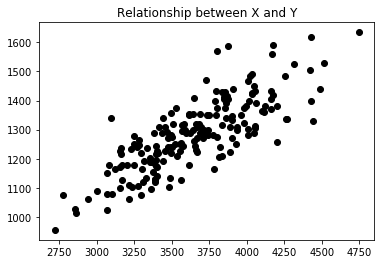

In [0]:
plt.title('Relationship between X and Y')
plt.scatter(x_training_set, y_training_set,  color='black')
plt.show()

**4. Model**

In [0]:
x = x_training_set.reshape(-1, 1)
x_test = x_test_set.reshape(-1, 1)

y = y_training_set.reshape(-1, 1)
y_test = y_test_set.reshape(-1, 1)

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

lr = linear_model.LinearRegression()

lr.fit(x, y_training_set)

print('R sq: ', lr.score(x ,y_training_set))
print('Correlation: ', math.sqrt(lr.score(x, y_training_set)))

R sq:  0.6426481851189627
Correlation:  0.8016534071024477


**5. Predict**

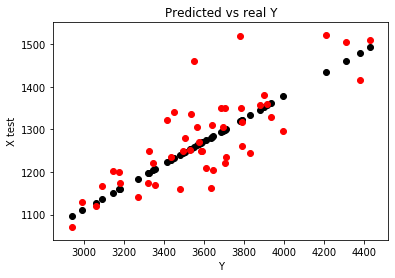

In [0]:
y_predicted = lr.predict(x_test)

plt.title('Predicted vs real Y')
plt.ylabel('X test')
plt.xlabel('Y')
plt.scatter(x_test, y_predicted,  color='black')
plt.scatter(x_test, y_test,  color='red')

plt.show()

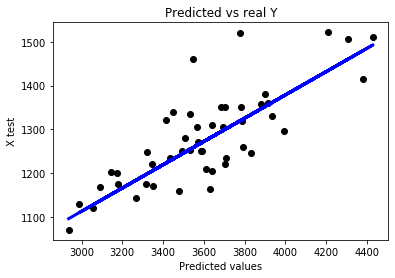

In [0]:
plt.title('Predicted vs real Y')
plt.ylabel('X test')
plt.xlabel('Predicted values')
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_predicted, color='blue', linewidth=3)

plt.show()

In [0]:
print("Coefficients: ", lr.coef_)
print("Mean squared error: %.2f"  % mean_squared_error(y_test_set, y_predicted))

Coefficients:  [0.26618947]
Mean squared error: 4346.32


## Polynimial Regressoion

**1. Read data**

In [0]:
data = pd.read_csv('Position_Salaries.csv')
data.head(12)

,Business Analyst,1,45000
0,Junior Consultant,2,50000
1,Senior Consultant,3,60000
2,Manager,4,80000
3,Country Manager,5,110000
4,Region Manager,6,150000
5,Partner,7,200000
6,Senior Partner,8,300000
7,C-level,9,500000
8,CEO,10,1000000


In [0]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

**2. Appply linear regression**

In [0]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3. Apply polynimial rgression**

In [0]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, y)

lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**4. Plot Linear**

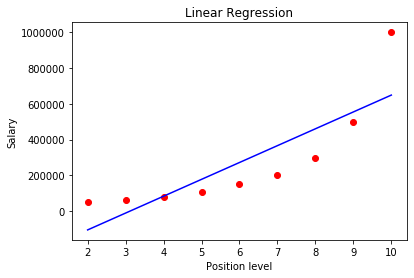

In [0]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lr.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**5. Plot Polynomial**

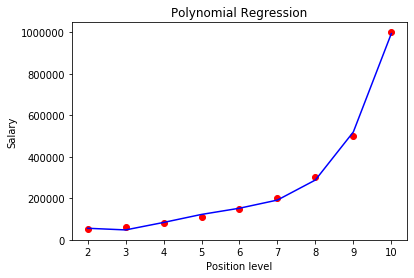

In [0]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lr2.predict(pr.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()

**6. Predict with Linear Regression**

In [0]:
lr.predict([[11]])

array([743055.55555556])

**7. Predict with Polinomial Regression**

In [0]:
lr2.predict(pr.fit_transform([[11]]))

array([1847222.22222238])

## PLA Strenght 

**1. Read data**

In [0]:
df = pd.read_csv('PLA.csv')

In [0]:
df.head(10)

,Temp,UFS
0,0,0
1,73,"56,29"
2,124,"64,6"
3,79,"58,9"
4,61,"54,2"
5,54,"45,5"
6,48,"41,1"
7,41,"37,9"
8,38,NaN
9,34,NaN


In [0]:
cdf = df.dropna()
cdf = cdf.drop([0])
cdf.head(10)

,Temp,UFS
1,73,"56,29"
2,124,"64,6"
3,79,"58,9"
4,61,"54,2"
5,54,"45,5"
6,48,"41,1"
7,41,"37,9"
10,85,61
11,138,71
12,95,65


In [0]:
sorded_cdf = cdf.sort_values('Temp')

X_train = sorded_cdf.iloc[:, 0:1].values
Y_train = sorded_cdf.iloc[:, 1].values

Y_train = [y.replace(',', '.') for y in Y_train]

**2. Model**


In [0]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3. Polynomial Regression**

In [0]:
pr = PolynomialFeatures(degree = 3)
X_poly = pr.fit_transform(X_train)
pr.fit(X_poly, Y_train)

lr3 = LinearRegression()
lr3.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**4. Plot Linear**

In [0]:
lr.predict(X_train)

array([45.59798383, 45.59798383, 47.75772666, 49.6089348 , 51.46014293,
       51.76867762, 53.92842045, 54.23695514, 54.54548983, 55.4710939 ,
       55.77962859, 56.70523266, 57.01376734, 57.32230203, 59.17351017,
       62.25885707, 65.03566927, 67.1954121 , 71.20636306, 75.52584871])

In [0]:
lr3.predict(pr.fit_transform(X_train))

array([40.83781933, 40.83781933, 45.17683425, 48.56455213, 51.65668486,
       52.14399185, 55.33668888, 55.76212617, 56.18003417, 57.38903669,
       57.77728179, 58.8983859 , 59.25769495, 59.60988355, 61.57602975,
       64.31358923, 66.2333284 , 67.39215996, 68.82531153, 69.42074726])

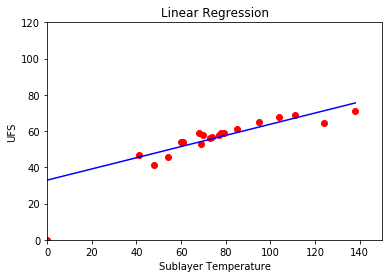

In [0]:
x0 = X_train
x0[0] = 0

y0 = Y_train
y0[0] = 0

plt.scatter(x0, y0, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Sublayer Temperature')
plt.ylabel('UFS')
plt.axis([0, 150, 0, 120])

plt.show()

**5. Plot Polynomial**

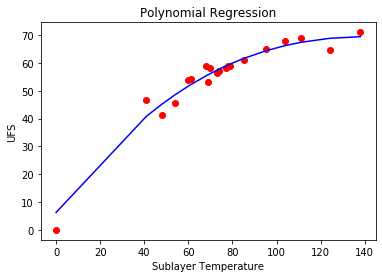

In [0]:
plt.scatter(x0, y0, color = 'red')
plt.plot(X_train, lr3.predict(pr.fit_transform(X_train)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Sublayer Temperature')
plt.ylabel('UFS')

plt.show(plt.xticks, plt.yticks)

**6. Predict**

In [0]:
lr.predict([[55]]) # i.e. what would be the UFS if subpayer temp is 55C?

array([49.91746949])

In [0]:
lr3.predict(pr.fit_transform([[55]])) 

array([49.10016934])

## Logistic regression: Titanic survivelance

**1. Read data**

In [0]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
len(df_train) # number of rows, i.e passengers in train set

891

**2. Preprocessing data**

In [0]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Embarked', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)
df_train.drop('Fare', axis=1, inplace=True)

In [0]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [0]:
df_train = pd.get_dummies(df_train, columns=["Pclass", "Sex"])
df_train.head()

,Survived,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,1,0,0,1,0
2,1,26.0,0,0,0,1,1,0
3,1,35.0,1,1,0,0,1,0
4,0,35.0,0,0,0,1,0,1


In [0]:
df_test = pd.get_dummies(df_test, columns=["Pclass", "Sex"])

In [0]:
df_train["Age"].mean(skipna=True)

29.69911764705882

In [0]:
df_train["Age"].median(skipna=True)

28.0

In [0]:
cdf_data = df_train.copy()
cdf_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True) # Fill NA/NaN values using the specified method

In [0]:
cdf_test = df_test.copy()
cdf_test["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True) # Fill NA/NaN values using the specified method

In [0]:
cdf_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
dtype: int64

In [0]:
cdf_data.head()

,Survived,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,1,0,0,1,0
2,1,26.0,0,0,0,1,1,0
3,1,35.0,1,1,0,0,1,0
4,0,35.0,0,0,0,1,0,1


In [0]:
X_train = cdf_data.iloc[:, 1:].values
Y_train = cdf_data.iloc[:, 0].values

X_test = cdf_test.iloc[:, :].values
Y_test = cdf_test.iloc[:, 0].values

In [0]:
X_train[2]

array([26.,  0.,  0.,  0.,  1.,  1.,  0.])

**3. Data exploration**

In [0]:
df_exp = pd.read_csv('titanic_train.csv')
# To be continued

**4. Model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**5. Prediction for YOU**

In [0]:
answer = model.predict([[25.0, 0, 0, 0, 1, 0, 1]])

if answer[0] == 1:
  print("Survived")
else:
  print("Did not survive...")

Did not survive...


![alt text](https://i.gifer.com/B4yq.gif)

In [0]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [0]:
model.decision_function([[55.0, 0, 0, 0, 1, 0, 1]])

array([-3.14653547])

**6. Model accuracy (i.e. % of properly classified examples)**

In [0]:
model.score(X_train, Y_train) # here should be test data, but we don't have true Y_test, only predicted

0.7867564534231201

In [0]:
print("Accuracy: ", (lr == y_test).mean())

## SVM for faces

In [2]:
! pip install face_recognition
! pip3 install opencv-python

     |████████████████████████████████| 100.2MB 104kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=bba2c1fb028830e3d8571d6e4c7ebbb117fc3cd0fa4107f0aa22e73ced247987
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [6]:
! unzip Kirpichnikov_photo.zip

Archive:  Kirpichnikov_photo.zip
replace Kirpichnikov_photo.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Kirpichnikov_photo.jpg  


In [0]:
import face_recognition
import cv2
import os
from sklearn import svm

In [5]:
encodings = []
names = []

train_dir = os.listdir('faces/')

for person in train_dir:
    pix = os.listdir("faces/" + person)
    for person_img in pix:
        face = face_recognition.load_image_file("faces/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        if len(face_bounding_boxes) != 1:
            print(person + "/" + person_img + " contains none or more than one faces and can't be used for training.")
            exit()
        else:
            face_enc = face_recognition.face_encodings(face)[0]
            encodings.append(face_enc)
            names.append(person)

FileNotFoundError: ignored

In [0]:
encodings

[]

In [0]:
names

[]

In [8]:
clf = svm.SVC(gamma='scale')
clf.fit(encodings, names)

test_image = face_recognition.load_image_file('Kirpichnikov_photo.jpg')
face_locations = face_recognition.face_locations(test_image)
print("Number of faces: ", len(face_locations))

for i in range(no):
    test_image_enc = face_recognition.face_encodings(test_image)[i]
    name = clf.predict([test_image_enc])
    print(name)

ValueError: ignored

## Numerical Portraits

In [10]:
import face_recognition

img = face_recognition.load_image_file('Kirpichnikov_photo.jpg')

encodings = face_recognition.face_encodings(img)
encodings

[array([-0.09753481,  0.04794787,  0.07078025,  0.00623107, -0.1998367 ,
         0.08491975, -0.05944487, -0.08521111,  0.07179228, -0.1260507 ,
         0.17576586,  0.00658569, -0.19333039, -0.02617279,  0.0440798 ,
         0.13685608, -0.12919819, -0.09802863, -0.12604576, -0.13514684,
        -0.06145347,  0.01246615, -0.01722048,  0.06320072, -0.10881897,
        -0.34184122, -0.04033438, -0.0057351 ,  0.01201946, -0.04553798,
        -0.00777772,  0.00834161, -0.1636247 ,  0.01095734, -0.04242227,
         0.04527327, -0.03913929, -0.02498481,  0.15728328, -0.03879659,
        -0.18800959,  0.06610786,  0.03923037,  0.22126928,  0.2163702 ,
         0.04629895,  0.02557884,  0.02972666,  0.15767325, -0.28163555,
         0.08437591,  0.13688552,  0.08530917,  0.00263935,  0.02720398,
        -0.15879464, -0.08756046,  0.1760966 , -0.0692291 ,  0.04697439,
         0.01252024, -0.07511075, -0.02056775, -0.0938143 ,  0.17380162,
         0.18466964, -0.09051812, -0.19009145,  0.1

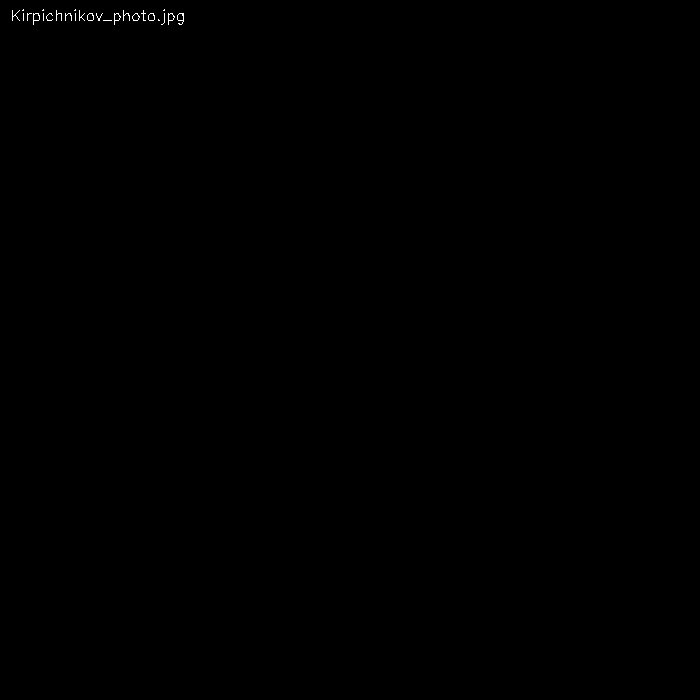

In [14]:
import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow

portrait = np.zeros([700,700,3])

for y in range(len(portrait)):
    for x in range(len(portrait[0])):
        portrait[y, x] = [0,0,0]

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(portrait,'Kirpichnikov_photo.jpg', (10, 20), font, 0.5,(255,255,255), 1, cv2.LINE_AA)

cv2_imshow(portrait)
